<a href="https://colab.research.google.com/github/ErnestoFCh/Simulacion-I/blob/main/Composicion_Simu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Definimos los valores a,b,c de la distribucion
a=190
b=210
c=230

##Metodo de composicion:
Resolver por el metodo de composicion.
##Resolver por aceptacion y rechazo

$$f(x)=\left\{\begin{matrix}
\frac{2(x-a)}{(c-a)(b-a)} &si \quad a\leq x\leq b \\
 -\frac{2(x-c)}{(c-a)(c-b)}& si \quad b\leq x\leq c
\end{matrix}\right.$$

Sabemos tambien que su distribucion acumulada es:
$$F(x)=\left\{\begin{matrix}
\frac{(x-a)^2}{(b-a)(c-a)} & si \quad a\leq x\leq b \\
 1-\frac{(x-c)^2}{(c-a)(c-b)}&si \quad b\leq x\leq c
\end{matrix}\right.$$

Dividimos en subareas por la formula del triangulo:
Sea $A_1$ el area del intervalo $[a,b]$ y $A_2$ del intervalo $[b,c]$:
$$A_1= \frac{b-a}{c-a}$$
$$A_2=\frac{c-b}{c-a}$$

Definimos las distribuciones de probabilidad acumulada (de las areas):
de la formula de la pendiente y la recta se tiene:

De $A_1$:
$$m=\frac{2}{(b-a)^2}$$
$$y=\frac{2(x-a)}{(b-a)^2}=f_1(x)$$

Ademas $F_1(x)$ se definde como:
$$F_1(x)=\int_{a}^{x}\frac{2(s-a)}{(b-a)^2}ds=\frac{(x-a)^2}{(b-a)^2}$$

De $A_2$:
$$m=\frac{\frac{2}{c-b}}{b-c}=-\frac{2}{(c-b)^2}$$
$$y=-\frac{2(x-c)}{(c-b)^2}=f_2(x)$$
Ademas $F_2(x)$ se definde como:
$$F_2(x)\int_{b}^{x}-\frac{2(s-c)}{(c-b)^2}ds=1-\frac{(x-c)^2}{(c-b)^2}$$

Definimos $f(x)=A_1f_1(x)+A_2f_2(x)$
$$f(x)= \frac{b-a}{c-a} \Bigg[\frac{2(x-a)}{(b-a)^2} \Bigg]+\frac{c-b}{c-a}\Bigg[-\frac{2(x-c)}{(c-b)^2}\Bigg]$$


$$f(x)=\frac{2(x-a)}{(b-a)(c-a)}-\frac{2(x-c)}{(c-a)(c-b)}$$

Definimos $F_{1}^{-1}$ y $F_{2}^{-1}$:
$$F_1(x)=\frac{(x-a)^2}{(b-a)^2}=R_2$$
$$F_{1}^{-1}=(b-a)\sqrt{R_2}+a \quad \text{si} \quad R_1<A_1 $$

$$F_2(x)=1-\frac{(x-c)^2}{(c-b)^2}=R_2$$
$$F_{2}^{-1}=c+(c-b)\sqrt{1-R_2}$$


###Grafica f.d.p

In [3]:
def f(x,a,b,c):
  if a<=x<=b:
    return (2*(x-a))/((b-a)*(c-a))
  elif b<=x<=c:
    return -(2*(x-c))/((c-a)*(c-b))
  elif x==b:
    return 2/(c-a)

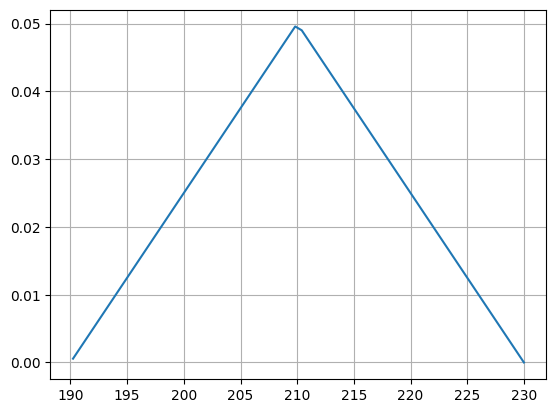

In [4]:
X=np.linspace(0, c, 400)       #Generamos numeros aleatorios
Y=[f(x,a,b,c) for x in X]      #Evaluamos los numeros aleatorios generados

plt.plot(X,Y)
plt.grid(True)                 # Mallamos la grafica

plt.show()

###Grafica acumulada:

In [5]:
def F(x,a,b,c):
  if a<=x<=b:
    return (x-a)**2/((b-a)*(c-a))
  elif b<=x<=c:
    return 1-(x-c)**2/((c-a)*(c-b))

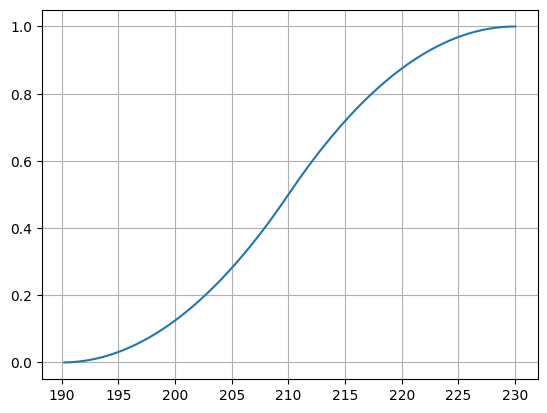

In [6]:
X=np.linspace(0, c, 400)
Y=[F(x,a,b,c) for x in X]

plt.plot(X,Y)
plt.grid(True)
plt.show()

###Generamos $x$ simulado:

In [7]:
A1=(b-a)/(c-a)

In [20]:
def Fi1(R,a,b,c):          #Funcion que simula f_1
  return (b-a)*np.sqrt(R)+a

In [19]:
def Fi2(R,a,b,c):          #Funcion que simula f_2
  return c+(c-b)*-np.sqrt(1-R)

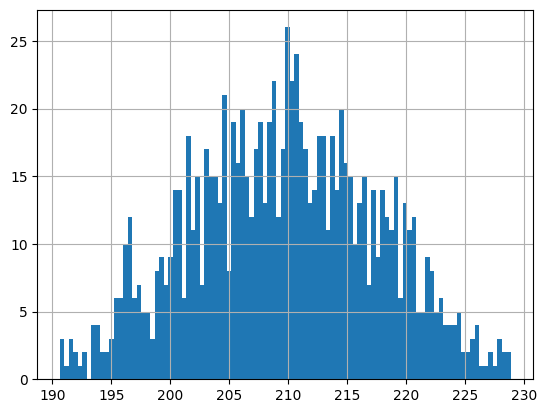

In [22]:
X=[]
for i in range(1000):
  R1=np.random.uniform(0,1)
  R2=np.random.uniform(0,1)

  if R1<A1:
    X.append(Fi1(R2,a,b,c))
  else:
    X.append(Fi2(R2,a,b,c))

plt.hist(X,bins=100)
plt.grid(True)
plt.show()